<h1> Life Expectancy and GDP </h1>

The data is arranged by country, year, life expectancy and GDP. My aim for this project is to investigate if there is a correlation between GDP and life expectancy. I'm going to do this by a) visualising the relationship between life expectancy and GDP using a scatter plot and b) by tracking life expectancy and GDP across the years for each country and seeing if they correlate. 


<h2> Imports and data viewing </h2>

In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Load and view data
data = pd.read_csv('all_data.csv')

print(data.head())

#Get some basic metrics, numbers of years, numbers of countries etc..
num_years = data.Year.nunique()
num_countries = data.Country.nunique()
data_len = len(data)

print("The number of countries in the dataset is: " + str(num_countries))
print("The number of years in the dataset is: " + str(num_years))
print("The length of the data is: " + str(data_len))

#Rename life expectancy column to something easier
data.rename(columns={'Life expectancy at birth (years)': 'LifeYears'}, inplace=True)
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
The number of countries in the dataset is: 6
The number of years in the dataset is: 16
The length of the data is: 96
  Country  Year  LifeYears           GDP
0   Chile  2000       77.3  7.786093e+10
1   Chile  2001       77.3  7.097992e+10
2   Chile  2002       77.8  6.973681e+10
3   Chile  2003       77.9  7.564346e+10
4   Chile  2004       78.0  9.921039e+10
<class 'numpy.int64'>


<h2> Examine GDP and life expectancy </h2>

                                   GDP  LifeYears
Country                                          
Chile                     1.697888e+11   78.94375
China                     4.957714e+12   74.26250
Germany                   3.094776e+12   79.65625
Mexico                    9.766506e+11   75.71875
United States of America  1.407500e+13   78.06250
Zimbabwe                  9.062580e+09   50.09375


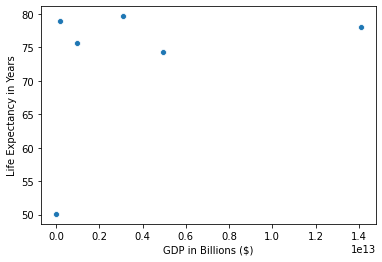

In [38]:
"""Now I'm going to use a scatter plot to examine if 
there are any trends in the data between life expectancy and GDP."""

#First I need to get a mean of GDP and life expectancy across the years
data_pivot_table = pd.pivot_table(data, values=['LifeYears', 'GDP'], index='Country', aggfunc='mean')
print(data_pivot_table) 

sns.scatterplot(data= data_pivot_table, x="GDP", y="LifeYears")
plt.xlabel('GDP in Billions ($)')
plt.ylabel('Life Expectancy in Years')
plt.show()

This plot isn't very clear. There are a couple of outliers which are skewing the data. We also don't have many data points since we collapsed across the years so it is difficult to see if we have particular trends.  

Lets try again but look at some line plots, tracking changes in GDP across the years for each country alongside changes in ages across the years for each country.

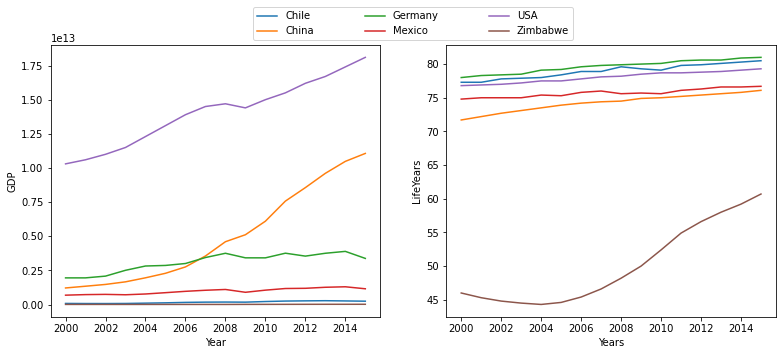

In [150]:
""" Side by side line plots showing GDP/Life Expectancy 
across the years for each country"""

fig = plt.figure(figsize = (13,5))
axs = plt.subplot(1,2,1)
gdp_plot = sns.lineplot(data=data, x="Year", y="GDP", hue="Country", legend=False)

plt.subplot(1,2,2)
life_plot = sns.lineplot(data=data, x="Year", y="LifeYears", hue="Country",legend=False)

plt.xlabel('Years')
labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

plt.legend(labels=labels, bbox_to_anchor=(-0.6, 1, 1, 0.5), loc='lower left',
           ncol=3, mode="expand") 
#bbox_to_anchor accepts a tuple of (up to) 4 values (x, y, width and height) where x and y are the lower left corner of the box
plt.show()

This is better. We can see now that life expectancy in all 5 countries increased between 2000 and 2015. This is particularly dramatic in Zimbabwe. However, we don't see a corresponding increase in GDP for Zimbabwe. There a few reasons for this. Life expectancy might have increase so much post 2008 in Zimbabwe could be due to the political and economic unrest that affected the country from 2001-2008. It could also be due to the fact that Zimbabwe's GDP is much lower than the some of the other countries in the dataset, and so changes in GDP are being washed out (which is why it appears that Zimbabwe's GDP hasn't changed from 2000). We can check this quickly by plotting only Zimbabwe's GDP across the years.

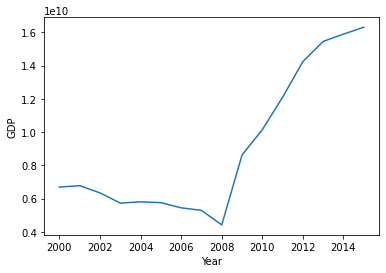

In [152]:
sns.lineplot(data=data[data.Country == 'Zimbabwe'], x="Year", y="GDP")

This shows a marked increased in GDP at the year 2008. The same year that we also see an increase in life expectancy. Now we can look at the correletions in the data. 